In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_1 = pd.read_csv("./data/cleaned/df_merged.csv")

### Have a General View of the relationship between Genres and MBTI types

In [138]:
df_mbti_genre = df_1.copy()

# Since a movie can belong to multiple genres, we need to split the genre field and then explode it
df_mbti_genre['genre'] = df_mbti_genre['genre'].str.split(', ')

# Exploding the dataframe on the 'genre' column
df_mbti_genre = df_mbti_genre.explode('genre')

# Counting the number of each MBTI type across all movies, grouped by genre
mbti_count_by_genre = df_mbti_genre.groupby(['genre', 'mbti']).size().reset_index(name='count')

# Group by 'genre' and filter based on the sum of 'count'
mbti_count_by_genre = mbti_count_by_genre.groupby('genre').filter(lambda x: x['count'].sum() >= 100)

mbti_count_by_genre["total_count_each_genre"] = mbti_count_by_genre.groupby("genre")["count"].transform('sum')
mbti_count_by_genre["mbti_by_genre_proportion"] = mbti_count_by_genre["count"] / mbti_count_by_genre["total_count_each_genre"] * 100

mbti_count_by_genre["total_count_each_mbti"] = mbti_count_by_genre.groupby("mbti")["mbti_by_genre_proportion"].transform('sum')
mbti_count_by_genre["genre_by_mbti_proportion"] = mbti_count_by_genre["mbti_by_genre_proportion"] / mbti_count_by_genre["total_count_each_mbti"] * 100

In [139]:
mbti_count_by_genre.sample(10)

,genre,mbti,count,total_count_each_genre,mbti_by_genre_proportion,total_count_each_mbti,genre_by_mbti_proportion
47,Animation,ISTP,29,477,6.079665,102.121253,5.953378
86,Crime,ESTJ,21,227,9.251101,105.041659,8.807078
116,Drama,ESFP,78,883,8.833522,106.784391,8.272297
236,Mystery,ESTP,19,187,10.160428,121.417430,8.368179
17,Adventure,ENFP,45,1048,4.293893,78.117112,5.496738
89,Crime,INFP,8,227,3.524229,89.557478,3.935159
142,Family,ISTP,17,382,4.450262,102.121253,4.357821
229,Mystery,ENFJ,4,187,2.139037,60.240179,3.550848
130,Family,ENTP,23,382,6.020942,81.098939,7.424194
292,Short,INTJ,10,225,4.444444,69.982906,6.350757


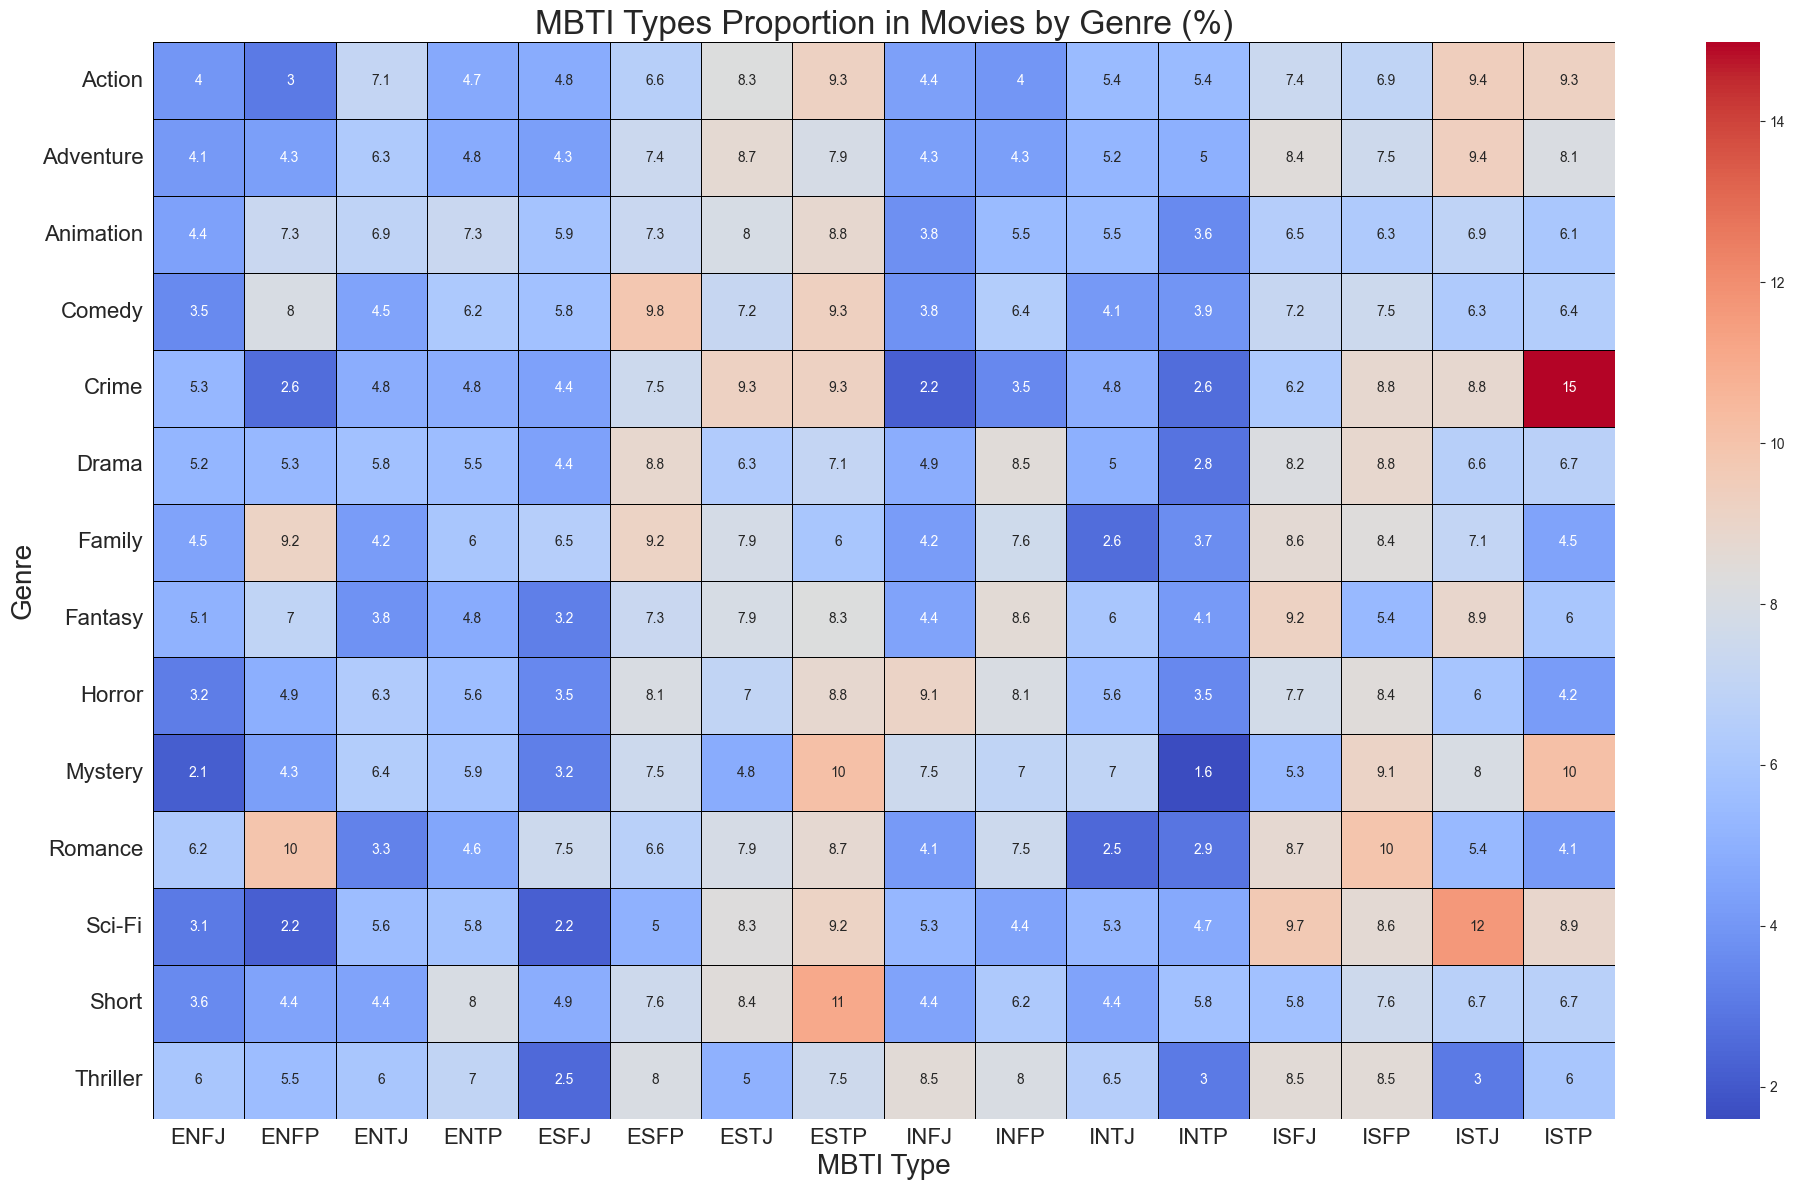

In [140]:
# Creating a pivot table for better plotting
pivot_table = mbti_count_by_genre.pivot_table(index='genre', columns='mbti', values='mbti_by_genre_proportion', fill_value=0)

# Convert counts to integers for better formatting in the heatmap
pivot_table = pivot_table.astype(float)

# Your existing code for creating the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", linewidths=.5, linecolor='black')
plt.title('MBTI Types Proportion in Movies by Genre (%)', fontsize=24)
plt.ylabel('Genre', fontsize=20)
plt.xlabel('MBTI Type', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(rotation=0, fontsize=16)
plt.tight_layout()

# Save the figure with high resolution
plt.savefig("./images/mbti_genre.png", dpi=300)  # Increase the dpi for better quality

# Show the plot
plt.show()


In [141]:
# Label four metrics
mbti_count_by_genre["I-E"] = mbti_count_by_genre["mbti"].isin(["ISTJ", "INTJ", "ISTP", "INTP", "ISFJ", "INFJ", "ISFP", "INFP"])
mbti_count_by_genre["I-E"] = mbti_count_by_genre["I-E"].replace({True: 'Introverts', False: 'Extroverts'})

mbti_count_by_genre["S-N"] = mbti_count_by_genre["mbti"].isin(["ISTJ", "ISTP", "ISFJ", "ISFP", "ESTJ", "ESTP", "ESFJ", "ESFP"])
mbti_count_by_genre["S-N"] = mbti_count_by_genre["S-N"].replace({True: 'Sensing', False: 'Intuition'})

mbti_count_by_genre["T-F"] = mbti_count_by_genre["mbti"].isin(["ISTJ", "ISTP", "INTJ", "INTP", "ESTJ", "ESTP", "ENTJ", "ENTP"])
mbti_count_by_genre["T-F"] = mbti_count_by_genre["T-F"].replace({True: 'Thinking', False: 'Feeling'})

mbti_count_by_genre["J-P"] = mbti_count_by_genre["mbti"].isin(["ISTJ", "ISFJ", "INTJ", "INFJ", "ESTJ", "ESFJ", "ENTJ", "ENFJ"])
mbti_count_by_genre["J-P"] = mbti_count_by_genre["J-P"].replace({True: 'Judging', False: 'Perceving'})

In [142]:
def plot_mbti_proportions_genre(data, category, file_name, colors=("lightblue", "lightcoral")):
    """
    Function to plot MBTI proportions by genre, grouped by a specified MBTI category, with customizable colors.

    Parameters:
    data (DataFrame): The dataset containing MBTI information.
    category (str): The MBTI category to group by. Options: 'I-E', 'S-N', 'T-F', 'J-P'.
    colors (tuple): A tuple of two color values for the plot.
    """
    # Grouping the data by 'genre' and the specified category, summing 'mbti_by_genre_proportion'
    grouped_data = data.groupby(['genre', category])['mbti_by_genre_proportion'].sum().reset_index()

    # Plotting with the specified colors
    plt.figure(figsize=(20, 10))
    sns.barplot(x='genre', y='mbti_by_genre_proportion', hue=category, data=grouped_data, palette=colors)
    plt.title(f'Sum of MBTI Proportion in Each Genre Grouped by {category}', fontsize=24)
    plt.xticks(fontsize = 16)
    plt.yticks(rotation=0, fontsize=16) 
    plt.ylabel('MBTI Proportion (%)', fontsize=20)
    plt.xlabel('Genre', fontsize=20)
    plt.legend(title=category, fontsize = 14)
    plt.tight_layout()

    # Saving the plot to a file
    file_path = f"./images/{file_name}.png"
    plt.savefig(file_path)

    # Displaying the plot
    plt.show()


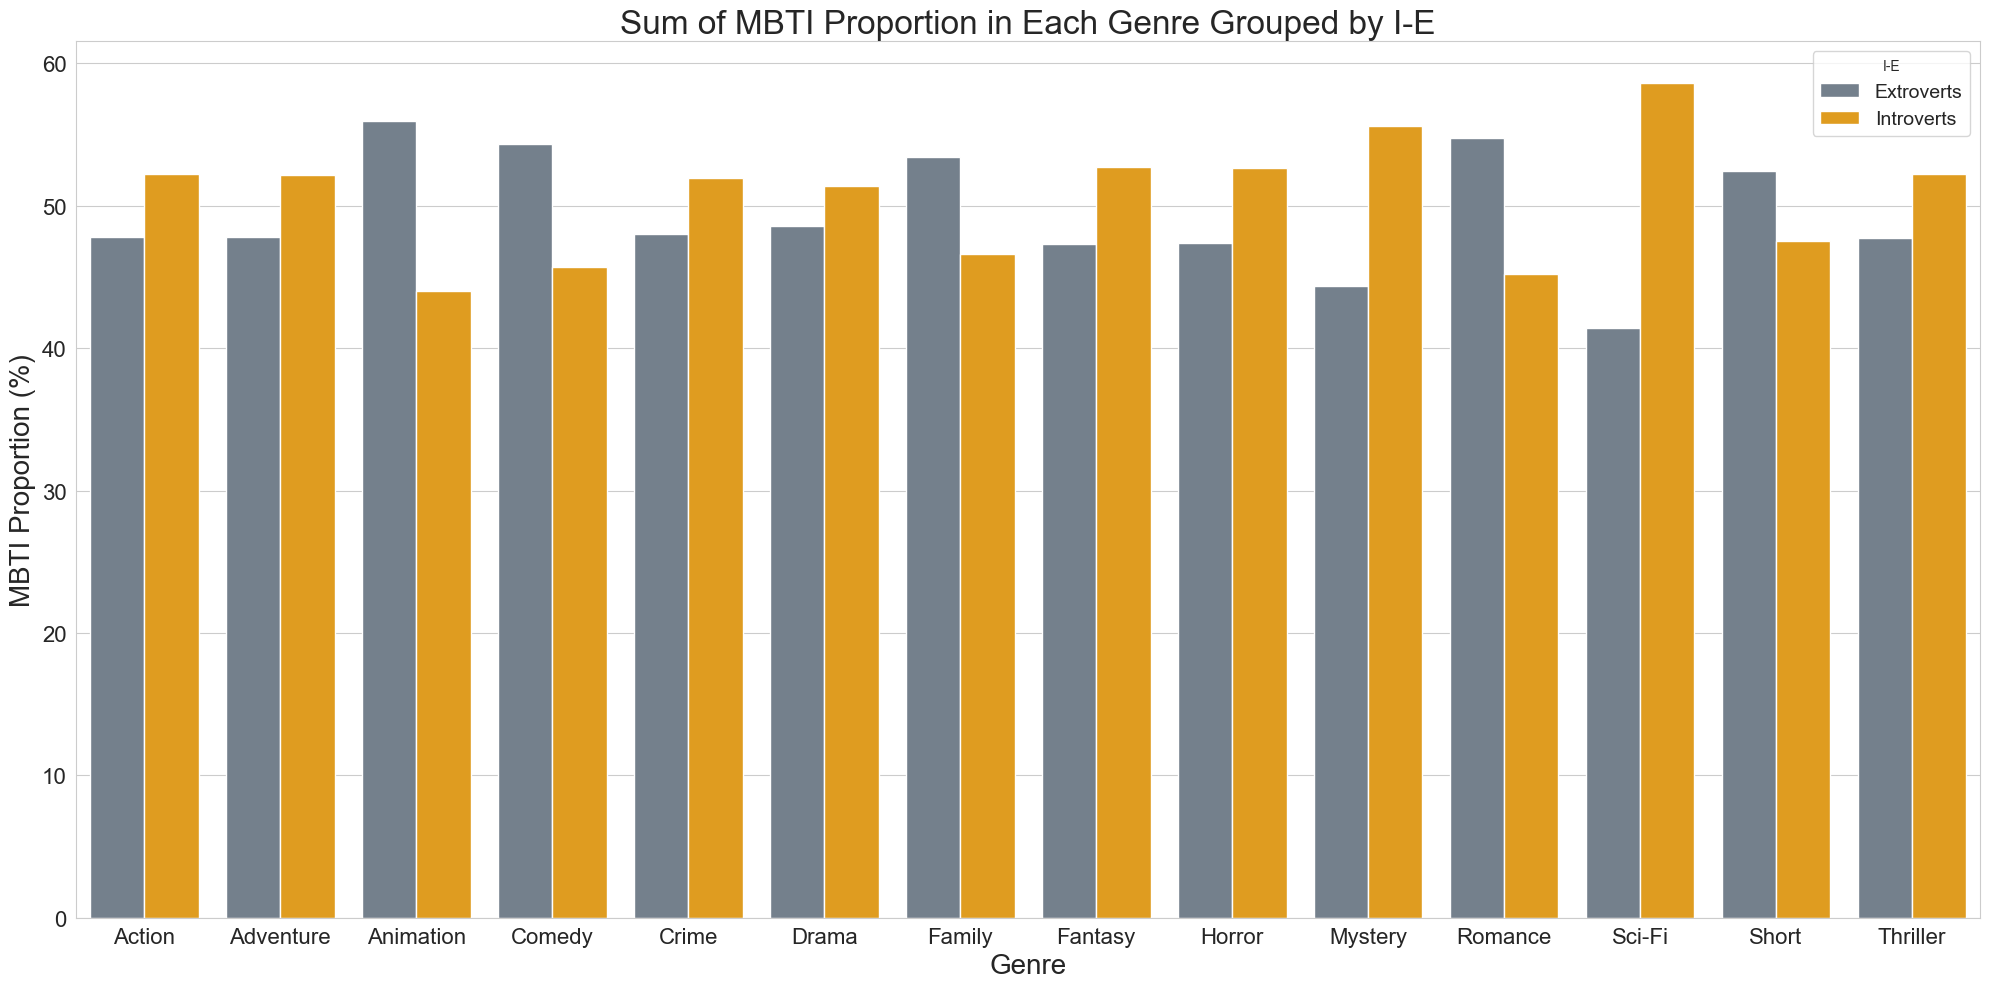

In [143]:
# I-E
plot_mbti_proportions_genre(mbti_count_by_genre, 'I-E',"Sum of MBTI Proportion in Each Genre Grouped by I-E", colors=("#708090", "#FFA500"))  # Custom colors for Introverts and Extroverts

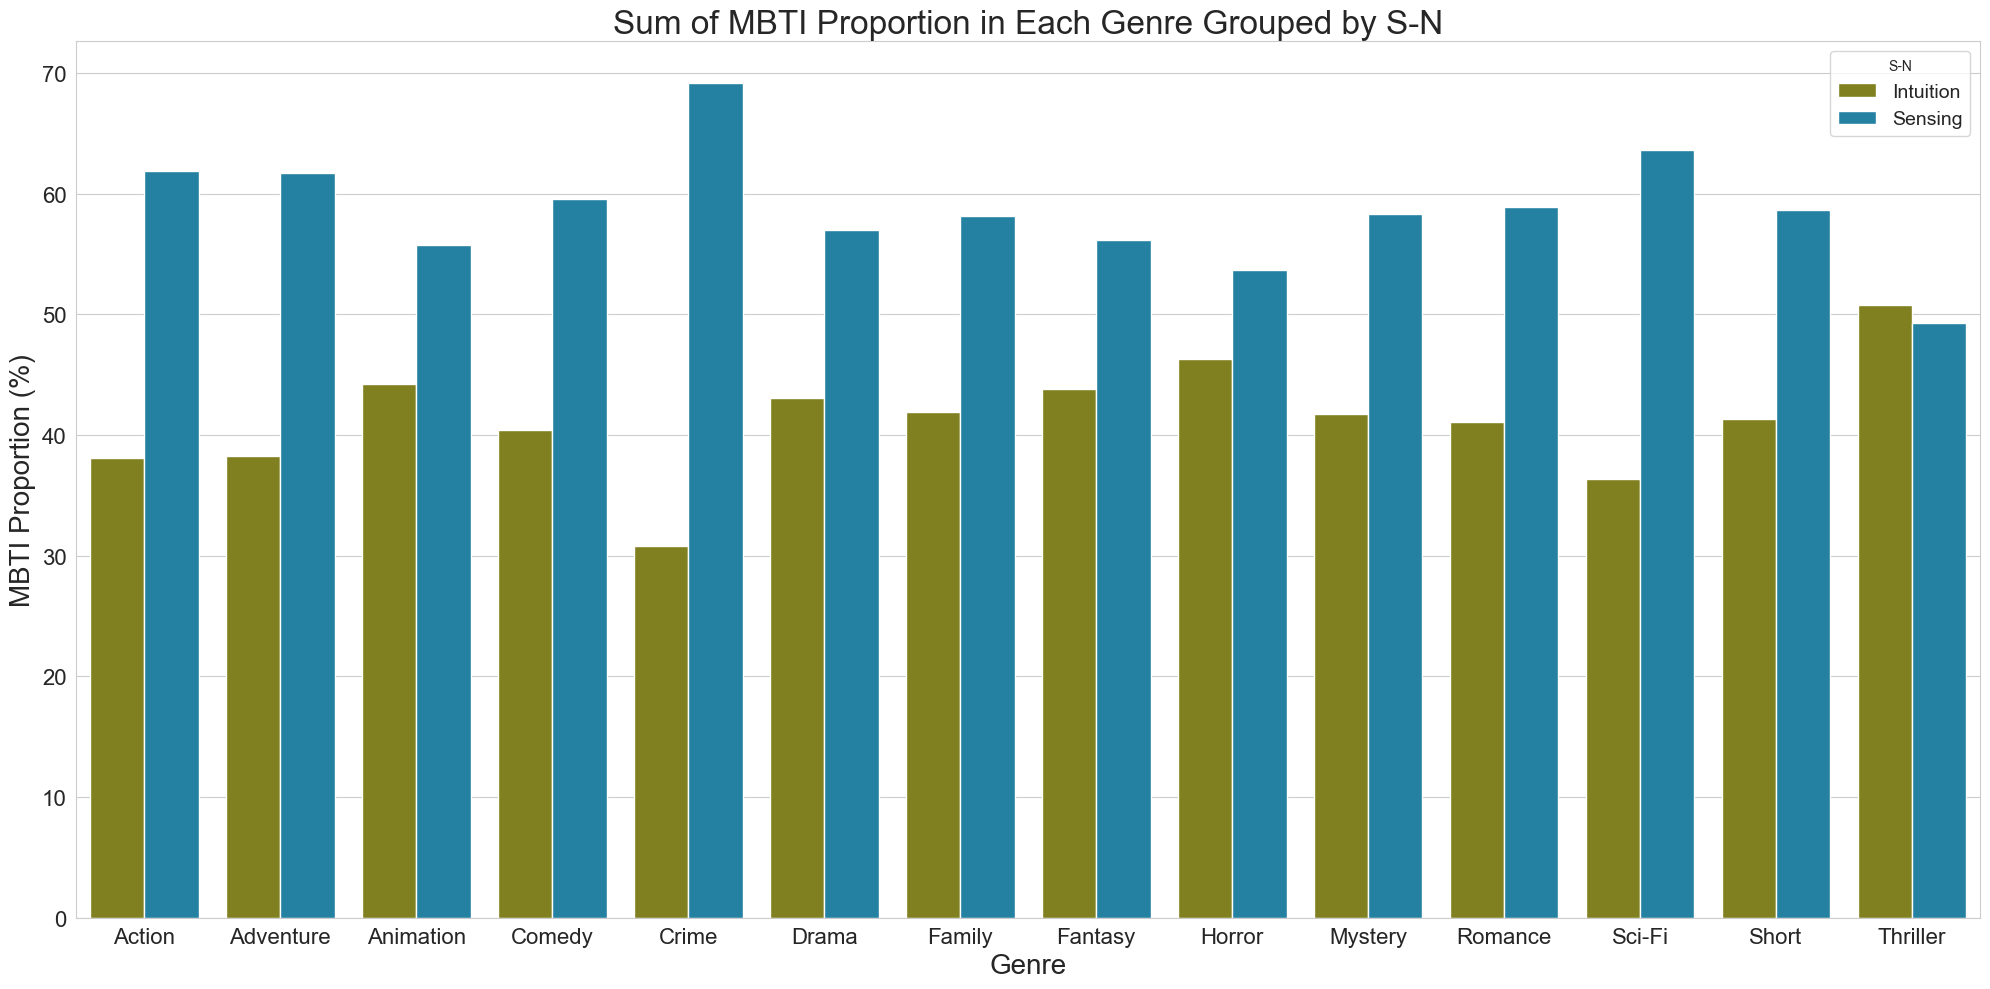

In [144]:
# S-N
plot_mbti_proportions_genre(mbti_count_by_genre, 'S-N',"Sum of MBTI Proportion in Each Genre Grouped by S-N", colors=("#909010", "#108BB7"))

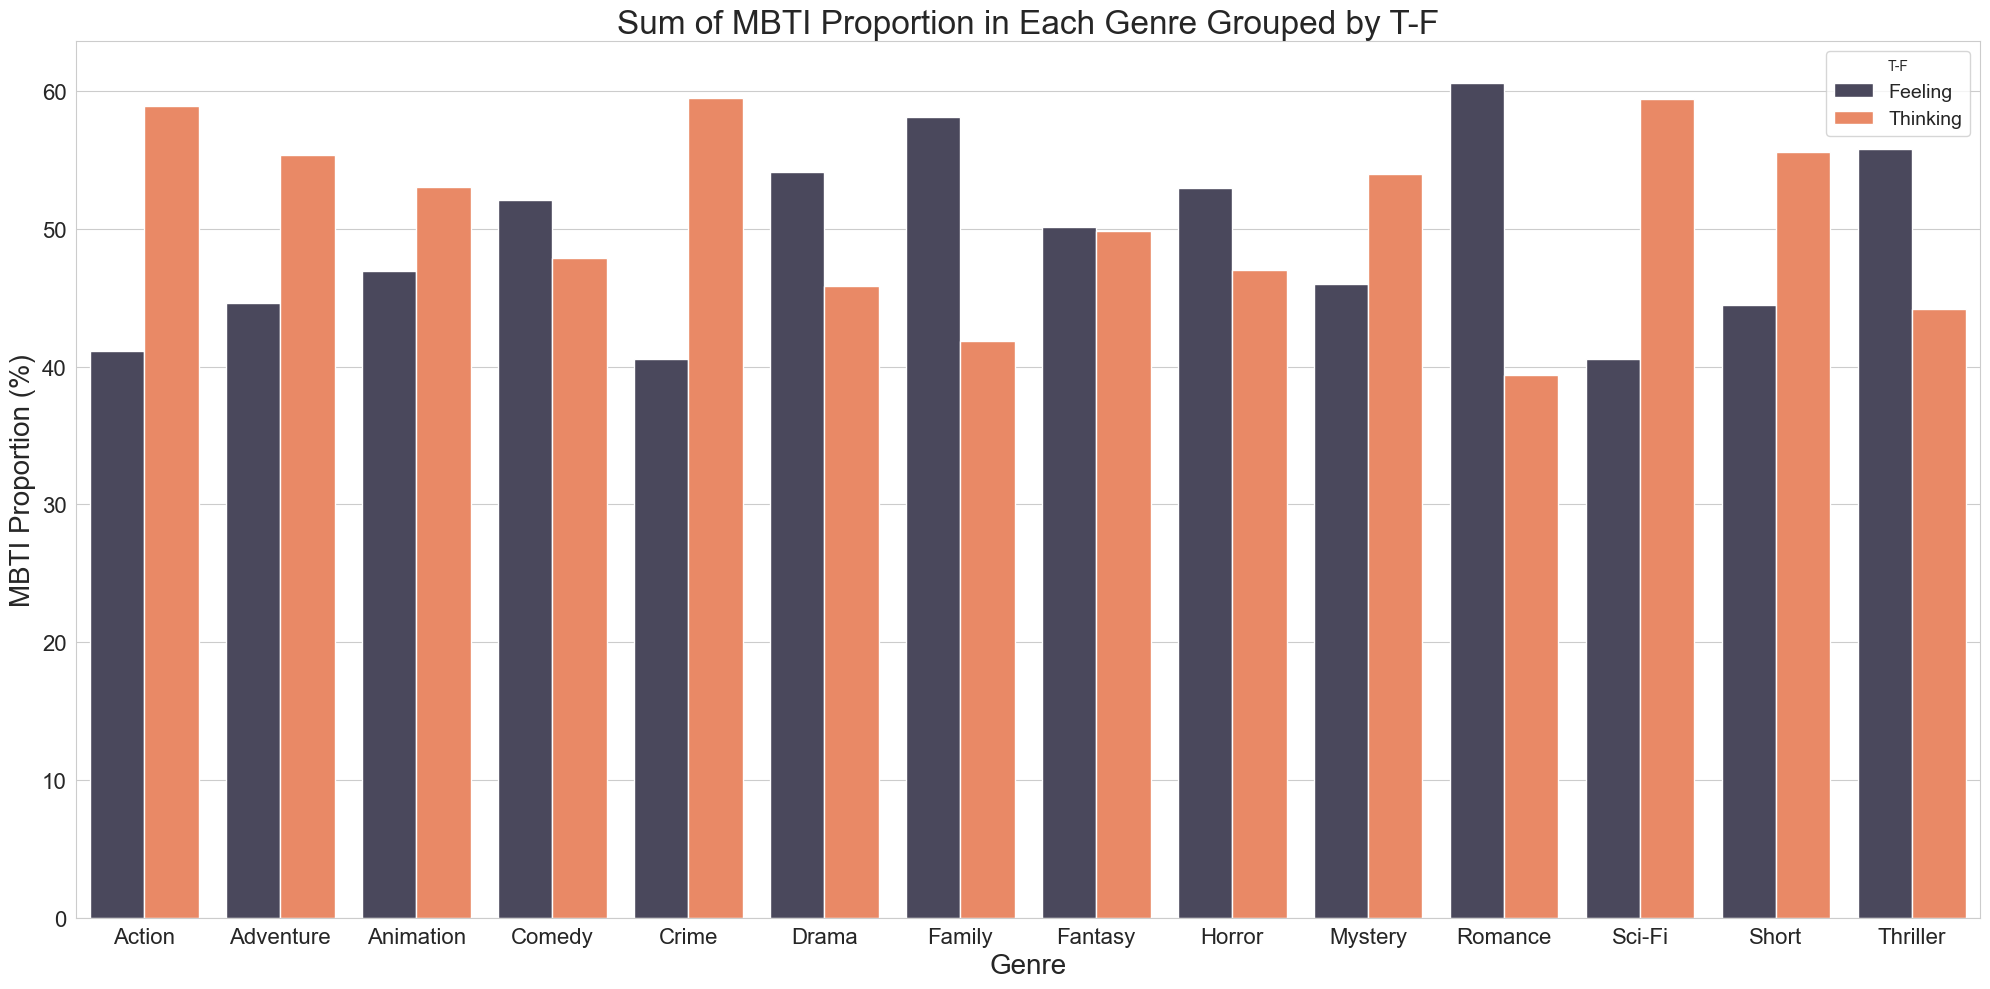

In [145]:
# T-F
plot_mbti_proportions_genre(mbti_count_by_genre, 'T-F',"Sum of MBTI Proportion in Each Genre Grouped by T-F", colors=("#47455F", "#FF7F50"))

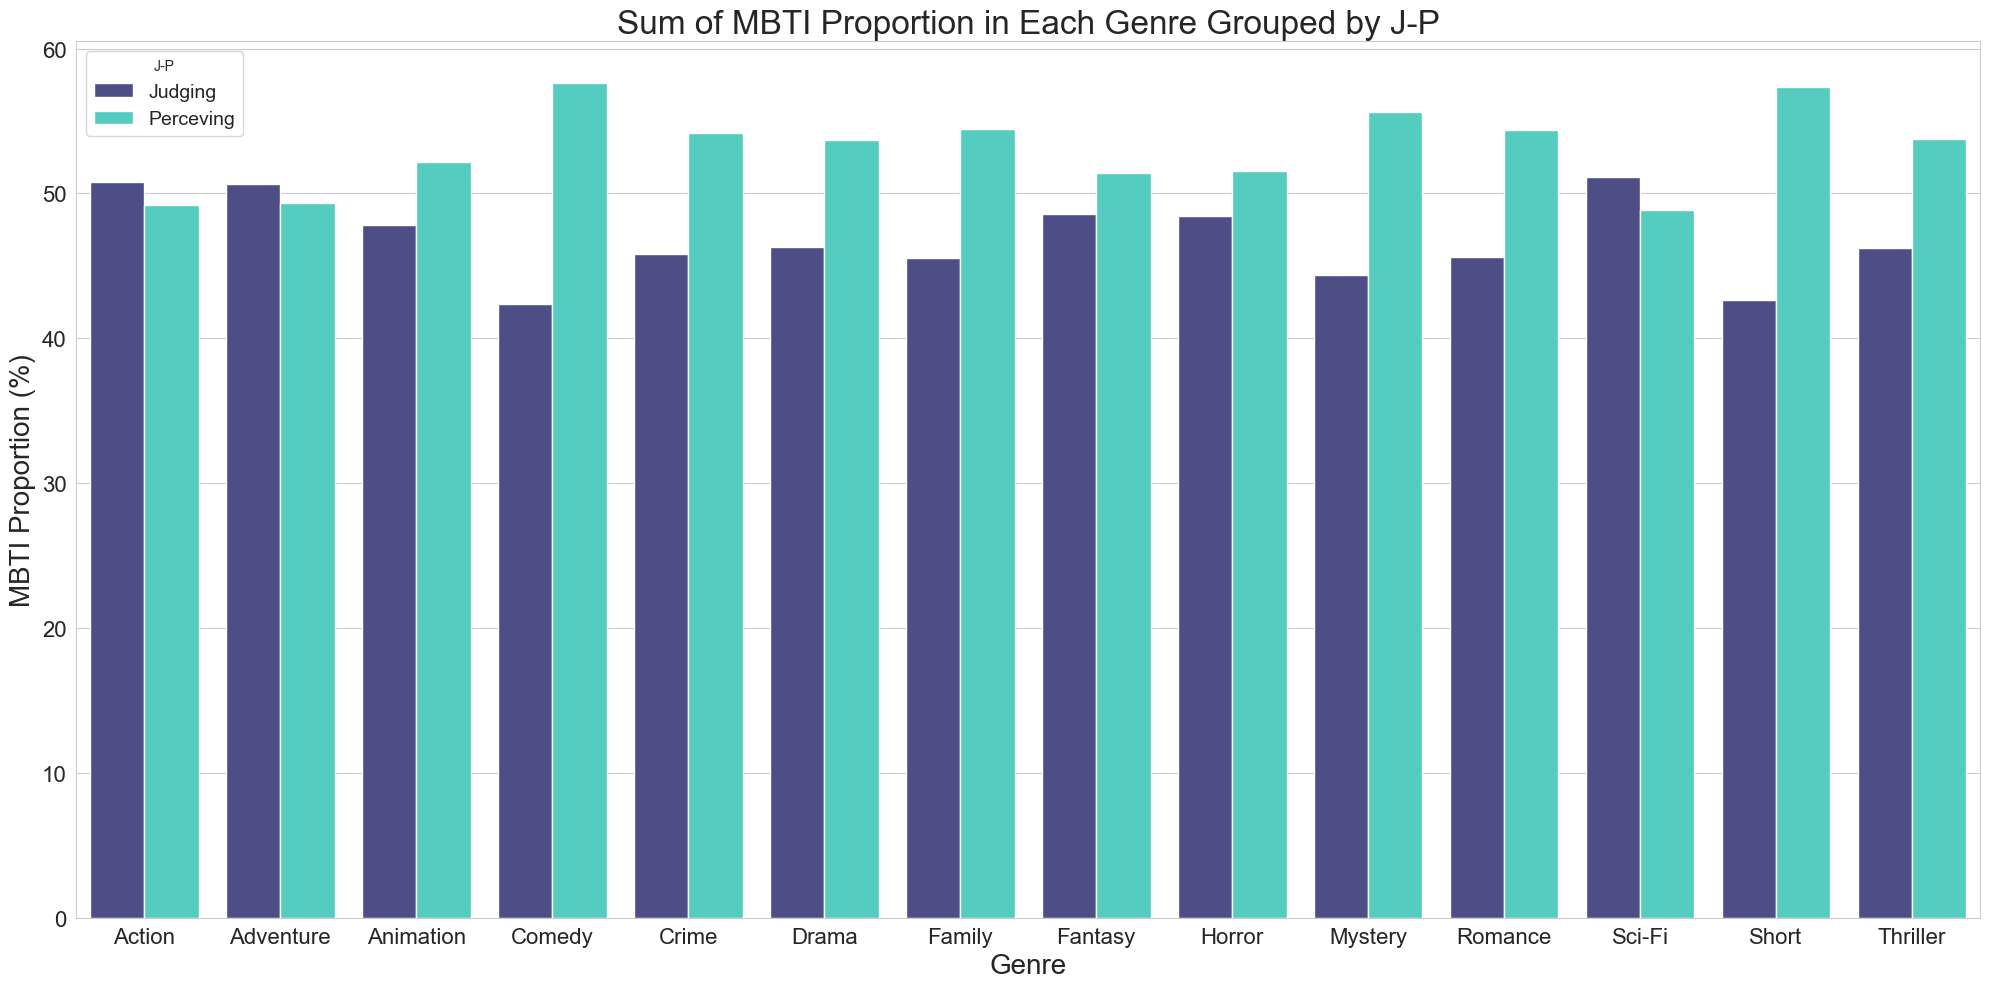

In [146]:
# J-P
plot_mbti_proportions_genre(mbti_count_by_genre, 'J-P',"Sum of MBTI Proportion in Each Genre Grouped by J-P", colors=("#444490", "#40E0D0"))

<Figure size 1800x1000 with 0 Axes>

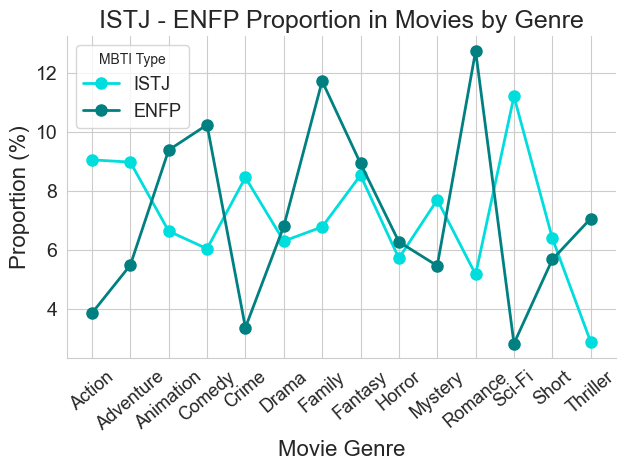

In [147]:
# Filtering for ISTJ and ENFP
filtered_df = mbti_count_by_genre[mbti_count_by_genre['mbti'].isin(['ISTJ', 'ENFP'])]

# Pivoting the DataFrame and reordering columns for correct legend
pivot_df = filtered_df.pivot(index='genre', columns='mbti', values='genre_by_mbti_proportion')
pivot_df = pivot_df[['ISTJ', 'ENFP']]  # Ensuring ISTJ is first and ENFP is second

# Adjusting the plot to make it wider
plt.figure(figsize=(18, 10))  # Increased width
sns.set_style("whitegrid")

# Line plot with wider plot size
ax = pivot_df.plot(kind='line', marker='o', color=['#00DDDD', '#008080'], linewidth=2, markersize=8)

# Customizing the plot with wider size
plt.xlabel('Movie Genre', fontsize=16)
plt.ylabel('Proportion (%)', fontsize=16)
plt.title('ISTJ - ENFP Proportion in Movies by Genre', fontsize=18)
plt.xticks(rotation=40, ticks=range(len(pivot_df.index)), labels=pivot_df.index, fontsize=13)
plt.yticks(fontsize=14)
ax.legend(['ISTJ', 'ENFP'], title='MBTI Type', fontsize=13)
sns.despine()

# Showing the plot with the corrected legend
plt.tight_layout()

# Save the figure with high resolution
plt.savefig("./images/ISTJ-ENFP_genre.png", dpi=300)  # Increase the dpi for better quality

plt.show()